# Black Scholes Model
- Get the price of apple stock in european markets to calculate the volatility
- Calculate the expected Call price of the option

In [2]:
import numpy as np
from scipy.stats import norm

In [3]:
def get_b(x0, time, X, r, sigma):
    b = (np.log(x0/X) + (r - 0.5 * sigma**2) * time) / (sigma * np.sqrt(time))
    return b

In [4]:
# Example from class
x0 = 20
time = 5
X = 25
r = 0.02
sigma = 2
b = get_b(x0, time, X, r, sigma)
print(b)

-2.2636037126727206


In [5]:
def get_c(x0, sigma, r, time, b, X):
    option = x0 * norm.cdf(sigma * np.sqrt(time) + b) - X * np.exp(-r * time) * norm.cdf(b)
    return option

In [6]:
option = get_c(x0, sigma, r, time, b, X)
print(option)

19.461018007387455


In [7]:
# x0: initial value
# time: time to maturity
# X: strike price
# r: risk-free interest rate
# sigma: volatility of the underlying asset

def get_options(x0, time, X, r, sigma):
    b = (np.log(x0/X) + (r - 0.5 * sigma**2) * time) / (sigma * np.sqrt(time))
    option = x0 * norm.cdf(sigma * np.sqrt(time) + b) - X * np.exp(-r * time) * norm.cdf(b)
    return option

In [8]:
# Original values Dec 6th Munich Stock Exchange 2023
r = 0.04790 # According to tresury direct using long 
sigma = 0.1924 # Volatility of apple stock
b = get_b(178.92, 1, 200, r, sigma)
value = get_options(178.92, 1, 200, 0.04790, 0.1924)
print(value)

9.059707780259949


In [9]:
import yfinance as yf
df = yf.download('AAPL', start='2022-12-06', end='2023-12-06')['Close'] # First sections for Apple

[*********************100%***********************]  1 of 1 completed


In [10]:
# Get the sigma from the 
print(df)

Ticker            AAPL
Date                  
2022-12-06  142.910004
2022-12-07  140.940002
2022-12-08  142.649994
2022-12-09  142.160004
2022-12-12  144.490005
...                ...
2023-11-29  189.369995
2023-11-30  189.949997
2023-12-01  191.240005
2023-12-04  189.429993
2023-12-05  193.419998

[251 rows x 1 columns]


In [11]:
print(df.columns)

Index(['AAPL'], dtype='object', name='Ticker')


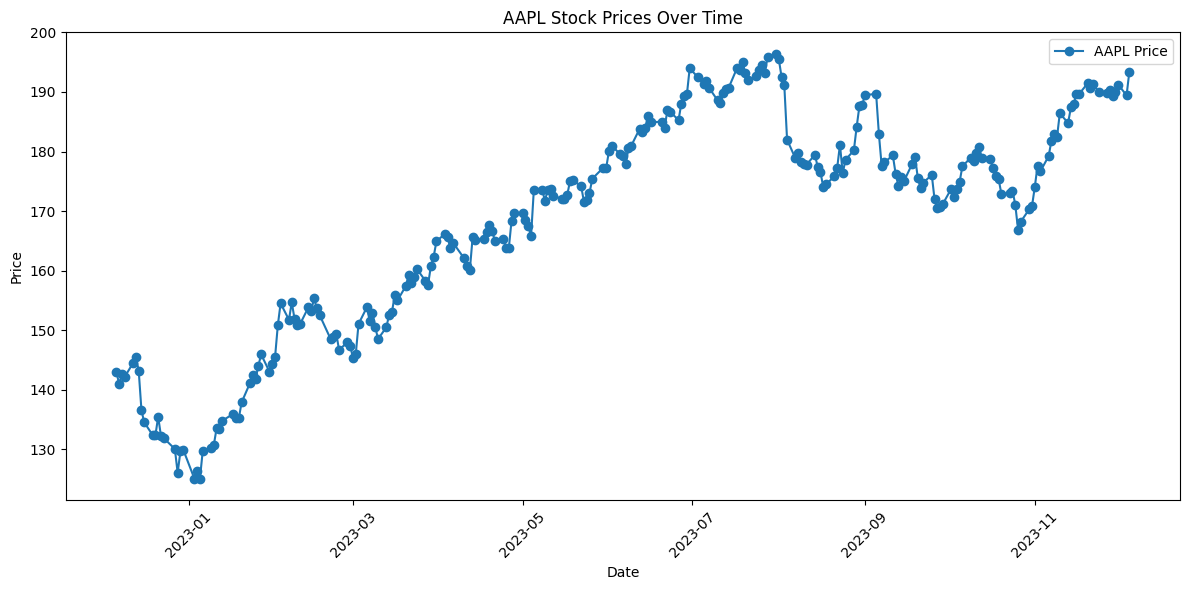

In [12]:
import matplotlib.pyplot as plt

# Reset the index if necessary
df_reset = df.reset_index()

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(df_reset['Date'], df_reset['AAPL'], label='AAPL Price', marker='o')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('AAPL Stock Prices Over Time')
plt.xticks(rotation=45)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


In [13]:
import numpy as np
import pandas as pd

# Assuming `df` is your DataFrame with AAPL prices in a column
# Ensure the Date column is parsed as a datetime index
df['Returns'] = df['AAPL'].pct_change()  # Calculate daily returns

# Calculate the standard deviation of daily returns (volatility)
daily_volatility = df['Returns'].std()

# Annualize the volatility
annualized_volatility = daily_volatility * np.sqrt(252)

print(f"Daily Volatility: {daily_volatility}")
print(f"Annualized Volatility: {annualized_volatility}")


Daily Volatility: 0.013680448350264097
Annualized Volatility: 0.2171703849519759


<Axes: title={'center': '30-Day Rolling Annualized Volatility'}, xlabel='Date'>

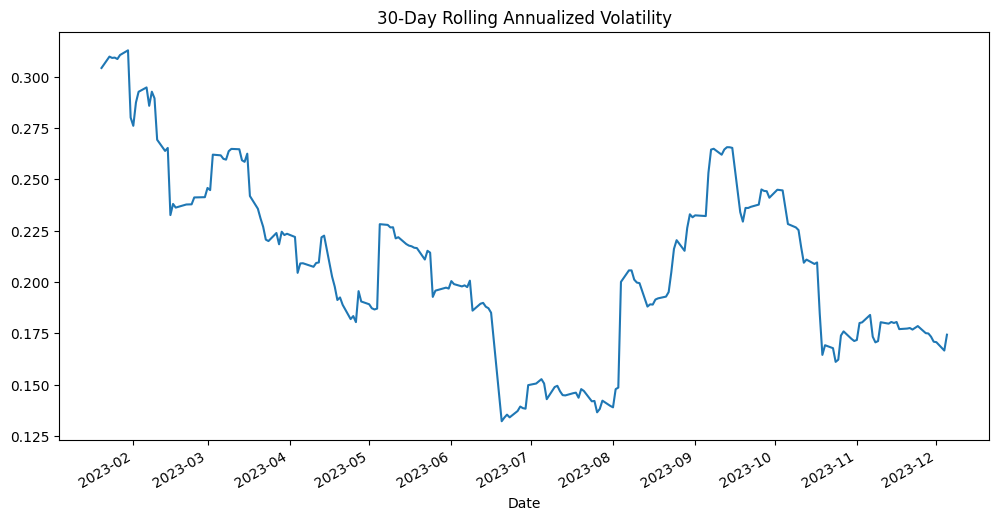

In [14]:
df['Rolling Volatility'] = df['Returns'].rolling(window=30).std() * np.sqrt(252)
df['Rolling Volatility'].plot(figsize=(12, 6), title='30-Day Rolling Annualized Volatility')

In [15]:
x0 = df_reset['AAPL'].iloc[-1]
print("Initial Value (x0):", x0)

Initial Value (x0): 193.4199981689453


In [16]:
options_apple_2023 = get_options(x0, 1, 230, 0.04790, annualized_volatility)
print("Option Price:", options_apple_2023)

Option Price: 7.804328974831542


In [17]:
total_at_end = x0 + options_apple_2023
print("Total at end:", total_at_end)

Total at end: 201.22432714377686


In [20]:
import yfinance as yf

# Replace with the desired option ticker or query the option chain
ticker = "AAPL"
stock = yf.Ticker(ticker)
option_chain = stock.option_chain('2023-01-20')  # Adjust expiration date

print(option_chain.calls.head())  # Print call options
print(option_chain.puts.head())  # Print put options

ValueError: Expiration `2023-01-20` cannot be found. Available expirations are: [2024-12-13, 2024-12-20, 2024-12-27, 2025-01-03, 2025-01-10, 2025-01-17, 2025-01-24, 2025-02-21, 2025-03-21, 2025-04-17, 2025-06-20, 2025-07-18, 2025-08-15, 2025-09-19, 2025-12-19, 2026-01-16, 2026-06-18, 2026-12-18, 2027-01-15]

# Compare to the current price
# Current price of Apple stock 224.229996 True

In [18]:
tickers = yf.Tickers('MSFT AAPL GOOG')
tickers.tickers['MSFT'].info
yf.download(['MSFT', 'AAPL', 'GOOG'], period='1mo')

[*********************100%***********************]  3 of 3 completed


Price        Adj Close                               Close              \
Ticker            AAPL        GOOG        MSFT        AAPL        GOOG   
Date                                                                     
2024-11-11  224.229996  181.763794  417.174957  224.229996  181.970001   
2024-11-12  224.229996  183.112274  422.184937  224.229996  183.320007   
2024-11-13  225.119995  180.285477  424.350616  225.119995  180.490005   
2024-11-14  228.220001  177.149033  426.037231  228.220001  177.350006   
2024-11-15  225.000000  173.692947  414.170990  225.000000  173.889999   
2024-11-18  228.020004  176.599655  414.929474  228.020004  176.800003   
2024-11-19  228.279999  179.376495  416.955414  228.279999  179.580002   
2024-11-20  229.000000  177.129044  414.659973  229.000000  177.330002   
2024-11-21  228.520004  169.048218  412.869995  228.520004  169.240005   
2024-11-22  229.869995  166.381256  417.000000  229.869995  166.570007   
2024-11-25  232.869995  169.237991  418.790009  232.869995  169.429993   
2024-11-26  235.059998  170.426651  427.989990  235.059998  170.619995   
2024-11-27  234.929993  170.626434  422.989990  234.929993  170.820007   
2024-11-29  237.330002  170.296799  423.459991  237.330002  170.490005   
2024-12-02  239.589996  172.783981  430.980011  239.589996  172.979996   
2024-12-03  242.649994  172.823944  431.200012  242.649994  173.020004   
2024-12-04  243.009995  175.890457  437.420013  243.009995  176.089996   
2024-12-05  243.039993  174.112473  442.619995  243.039993  174.309998   
2024-12-06  242.839996  176.290009  443.570007  242.839996  176.490005   
2024-12-09  246.750000  177.100006  446.019989  246.750000  177.100006   
2024-12-10  247.770004  186.529999  443.329987  247.770004  186.529999   

Price                         High                                 Low  \
Ticker            MSFT        AAPL        GOOG        MSFT        AAPL   
Date                                                                     
2024-11-11  418.010010  225.699997  182.085007  424.809998  221.500000   
2024-11-12  423.029999  225.589996  184.024994  424.440002  223.360001   
2024-11-13  425.200012  226.649994  182.615005  429.329987  222.759995   
2024-11-14  426.890015  228.869995  180.445007  428.170013  225.000000   
2024-11-15  415.000000  226.919998  175.880005  422.799988  224.270004   
2024-11-18  415.760010  229.740005  176.910004  418.399994  225.169998   
2024-11-19  417.790009  230.160004  180.169998  417.940002  226.660004   
2024-11-20  415.489990  229.929993  179.110001  417.290009  225.889999   
2024-11-21  412.869995  230.160004  175.580002  419.779999  225.710007   
2024-11-22  417.000000  230.720001  168.264999  417.399994  228.059998   
2024-11-25  418.790009  233.250000  170.460007  421.079987  229.740005   
2024-11-26  427.989990  235.570007  171.494995  429.040009  233.330002   
2024-11-27  422.989990  235.690002  171.139999  427.230011  233.809998   
2024-11-29  423.459991  237.809998  170.869995  424.880005  233.970001   
2024-12-02  430.980011  240.789993  173.600006  433.000000  237.160004   
2024-12-03  431.200012  242.759995  174.320007  432.470001  238.899994   
2024-12-04  437.420013  244.110001  176.429993  439.670013  241.250000   
2024-12-05  442.619995  244.539993  177.710007  444.660004  242.130005   
2024-12-06  443.570007  244.630005  176.839005  446.100006  242.080002   
2024-12-09  446.019989  247.240005  178.039993  448.329987  241.750000   
2024-12-10  443.329987  248.210007  188.029999  449.619995  245.339996   

Price                                     Open                          \
Ticker            GOOG        MSFT        AAPL        GOOG        MSFT   
Date                                                                     
2024-11-11  179.990005  416.000000  225.000000  180.070007  422.519989   
2024-11-12  180.990005  417.200012  224.550003  181.380005  418.250000   
2024-11-13  180.119995  418.209991  224.009995  182.149994  421.640015   
20

In [19]:
spy = yf.Ticker('SPY').funds_data
spy.description
spy.top_holdings

,Name,Holding Percent
Symbol,,
AAPL,Apple Inc,0.070607
NVDA,NVIDIA Corp,0.066547
MSFT,Microsoft Corp,0.061590
AMZN,Amazon.com Inc,0.037997
META,Meta Platforms Inc Class A,0.024550
GOOGL,Alphabet Inc Class A,0.019368
TSLA,Tesla Inc,0.018738
BRK-B,Berkshire Hathaway Inc Class B,0.017311
GOOG,Alphabet Inc Class C,0.016022
